TEST TRAINING WITH ADANIENT DATASET

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ta
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

In [3]:

working_dir = os.getcwd()

# Construct the path to the 'data' directory relative to the working directory
folder_path = os.path.join(working_dir, "data")
df = pd.read_csv(os.path.join(folder_path, "updated_ADANIENT.csv"))
df = df.drop(["Ticker"], axis=1)
df['SMA_14'] = df['Close'].rolling(window=14).mean()
df.loc[0:13, 'SMA_14'] = df.loc[13, 'SMA_14']
df['EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df.loc[0:13, 'RSI'] = df.loc[13, 'RSI']
df['Upper_Band'] = df['SMA_14'] + (df['Close'].rolling(window=14).std() * 2)
df['Lower_Band'] = df['SMA_14'] - (df['Close'].rolling(window=14).std() * 2)
df.head()

,Date,Close,High,Low,Open,Volume,SMA_14,EMA_14,RSI,Upper_Band,Lower_Band
0,2020-01-01,205.827087,208.401774,204.638754,206.965889,1553127,210.010972,205.827087,73.732752,NaN,NaN
1,2020-01-02,209.144501,211.125036,205.480514,205.975648,2991937,210.010972,206.269409,73.732752,NaN,NaN
2,2020-01-03,206.272736,210.283322,203.797067,208.203754,2512421,210.010972,206.269853,73.732752,NaN,NaN
3,2020-01-06,197.607880,205.728070,195.825395,205.728070,4353179,210.010972,205.114923,73.732752,NaN,NaN
4,2020-01-07,202.064072,203.698007,198.598136,198.598136,2966120,210.010972,204.708143,73.732752,NaN,NaN


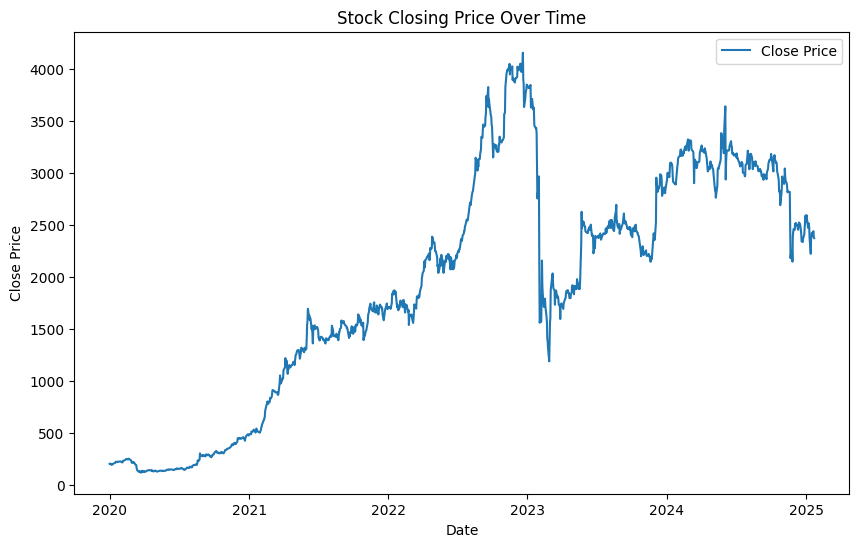

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


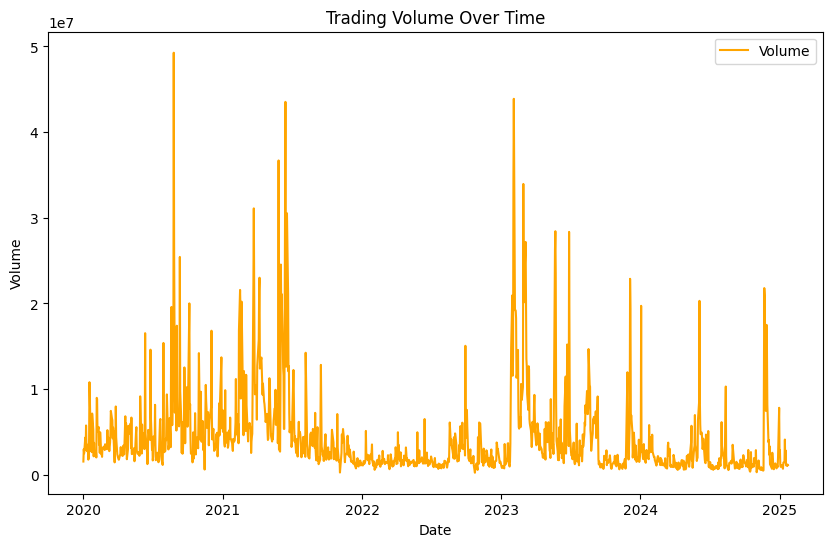

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

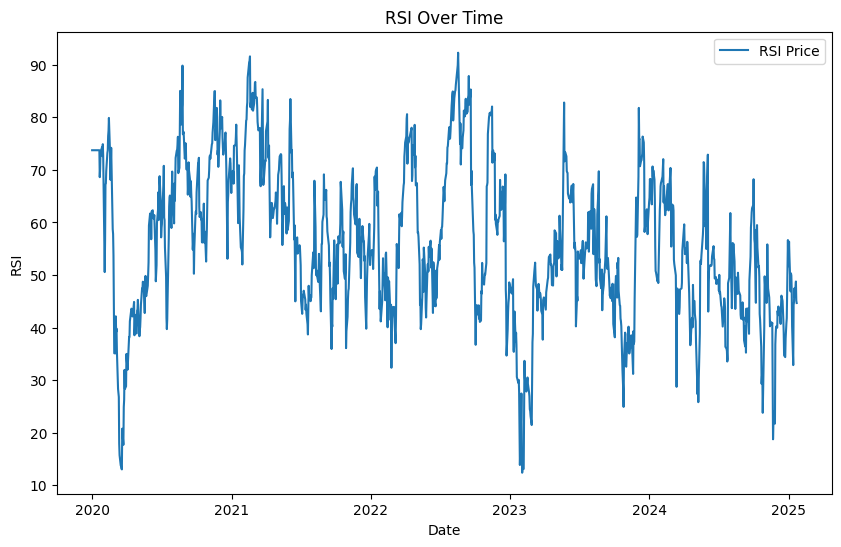

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['RSI'], label='RSI Price')
plt.title('RSI Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

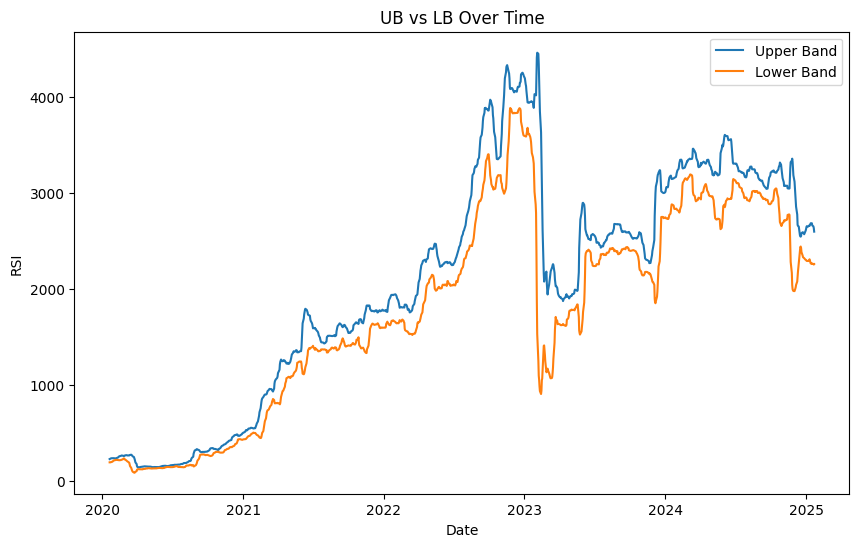

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band')
plt.title('UB vs LB Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [14]:
X = df.drop('Close', axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state=101)

In [ ]:
sequence_model = Sequential()
sequence_model.add(Dense(4,activation="relu"))
sequence_model.add(Dense(4,activation="relu"))
sequence_model.add(Dense(4,activation="relu"))
sequence_model.add(Dense(1))

sequence_model.compile(optimizer="rmsprop",loss=MeanSquaredError())